# 1. Data Overview

In [1]:
# Import packages

## Basic data processing
import numpy as np
import pandas as pd

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
#for map
import folium
import folium.plugins

## Modelling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, balanced_accuracy_score, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost.sklearn import XGBClassifier, XGBRegressor

# 2. Load Data

In [ ]:
#load the dataset
data = pd.read_csv("US_Accidents_March23.csv")
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [4]:
data.shape

(7728394, 46)

In [5]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


# 3. Data Preprocessing

In [6]:
# Drop irrelevant columns
'''
ID: ID is unique and meaningless for the dataset.
Description: I don't do text mining, therefore It's useless.
Country: All the data is from US, therefore all the data is the same.
Weather_Timestamp: The timestamp of weather observation record. It's useless here.
'''

irrelevant_columns = ['ID','Description','Country','Weather_Timestamp']
data_preprocessed = data.drop(irrelevant_columns, axis=1)

In [7]:
# Drop the column with missing value(<40%)
#replace the empty data with NAN
data_preprocessed.replace(" ",float("NaN"), inplace=True)
#count missing value (NaN, na null, none) of each columns, then transform the result to a pandas dataframe
count_missing_value = data_preprocessed.isna().sum() / data_preprocessed.shape[0] * 100
count_missing_value_df = pd.DataFrame(count_missing_value.sort_values(ascending=False), columns=['Missing%'])

Text(0, 0.5, 'Features')

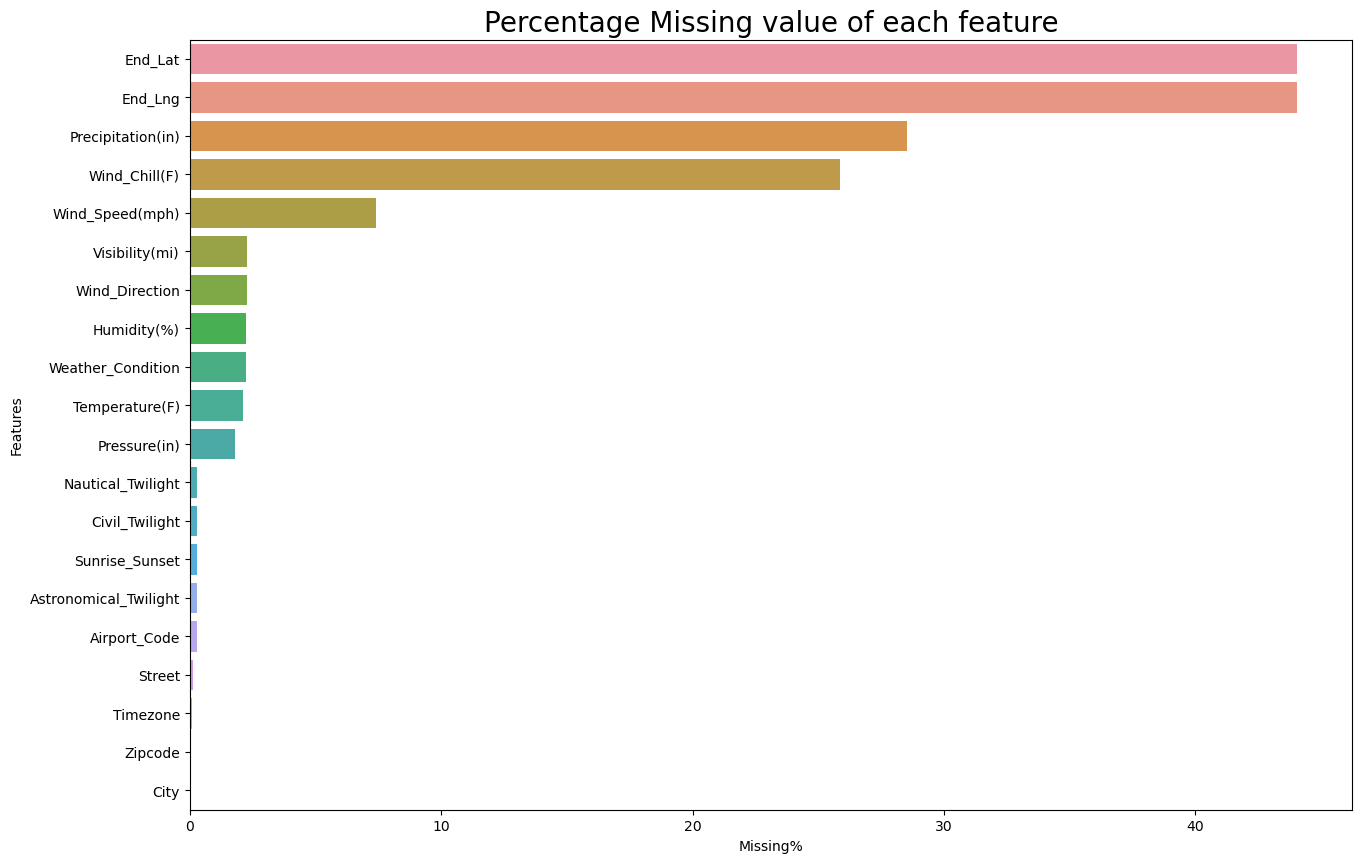

In [8]:
# Visualize the percentage(>0) of Missing value in each column.
missing_value_df = count_missing_value_df[count_missing_value_df['Missing%'] > 0]

plt.figure(figsize=(15, 10)) # Set the figure size
missing_value_graph = sns.barplot(y = missing_value_df.index, x = "Missing%", data=missing_value_df, orient="h")
missing_value_graph.set_title("Percentage Missing value of each feature", fontsize = 20)
missing_value_graph.set_ylabel("Features")

In [9]:
## Drop the column with Missing value(>40%)
missing_value_40_df = count_missing_value_df[count_missing_value_df['Missing%'] > 40]
# data_preprocessed.drop(missing_value_40_df.index, axis=1, inplace=True)
missing_value_40_df

,Missing%
End_Lat,44.029355
End_Lng,44.029355


In [10]:
#Data type correcting

In [11]:
data_preprocessed['Start_Time'] = pd.to_datetime(data_preprocessed['Start_Time'], format='mixed', errors='coerce')
data_preprocessed['End_Time'] = pd.to_datetime(data_preprocessed['End_Time'], format='mixed', errors='coerce')

In [12]:
# Display all the missing value
missing_value_df

,Missing%
End_Lat,44.029355
End_Lng,44.029355
Precipitation(in),28.512858
Wind_Chill(F),25.865904
Wind_Speed(mph),7.391355
Visibility(mi),2.291524
Wind_Direction,2.267043
Humidity(%),2.253301
Weather_Condition,2.244438
Temperature(F),2.120143


In [13]:
# Categorize the missing value to numerical and categorical for imputation purpose
numerical_missing = ['Wind_Speed(mph)', 'End_Lng', 'End_Lat', 'Visibility(mi)','Humidity(%)', 'Temperature(F)', 'Pressure(in)']
categorical_missing = ['Weather_Condition','Wind_Direction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

In [14]:
#Drop all NaN/NA/null
data_preprocessed_dropNaN_df = data_preprocessed.dropna()
data_preprocessed_dropNaN_df.reset_index(drop=True, inplace=True)

In [15]:
#Median imputation
# Imputation by corresponding class Median value 
data_preprocessed_median_df = data_preprocessed.copy()

# For numerical columns
for column_name in numerical_missing:
    data_preprocessed_median_df[column_name] = data_preprocessed_median_df.groupby('Severity')[column_name].transform(lambda x:x.fillna(x.median()))

# # For categorical columns(Majority value imputation)
for column_name in categorical_missing:
    data_preprocessed_median_df[column_name] = data_preprocessed_median_df.groupby('Severity')[column_name].transform(lambda x:x.fillna(x.fillna(x.mode().iloc[0])))

# Drop NaN and reset index
data_preprocessed_median_df.dropna(inplace=True)

In [16]:
# Choose the best dataset base on the performance of modeling
data_best_df = data_preprocessed_dropNaN_df.copy()
# Reset index
data_best_df.reset_index(inplace=True)

# 4. EDA

Text(0, 0.5, 'Weather_Condition')

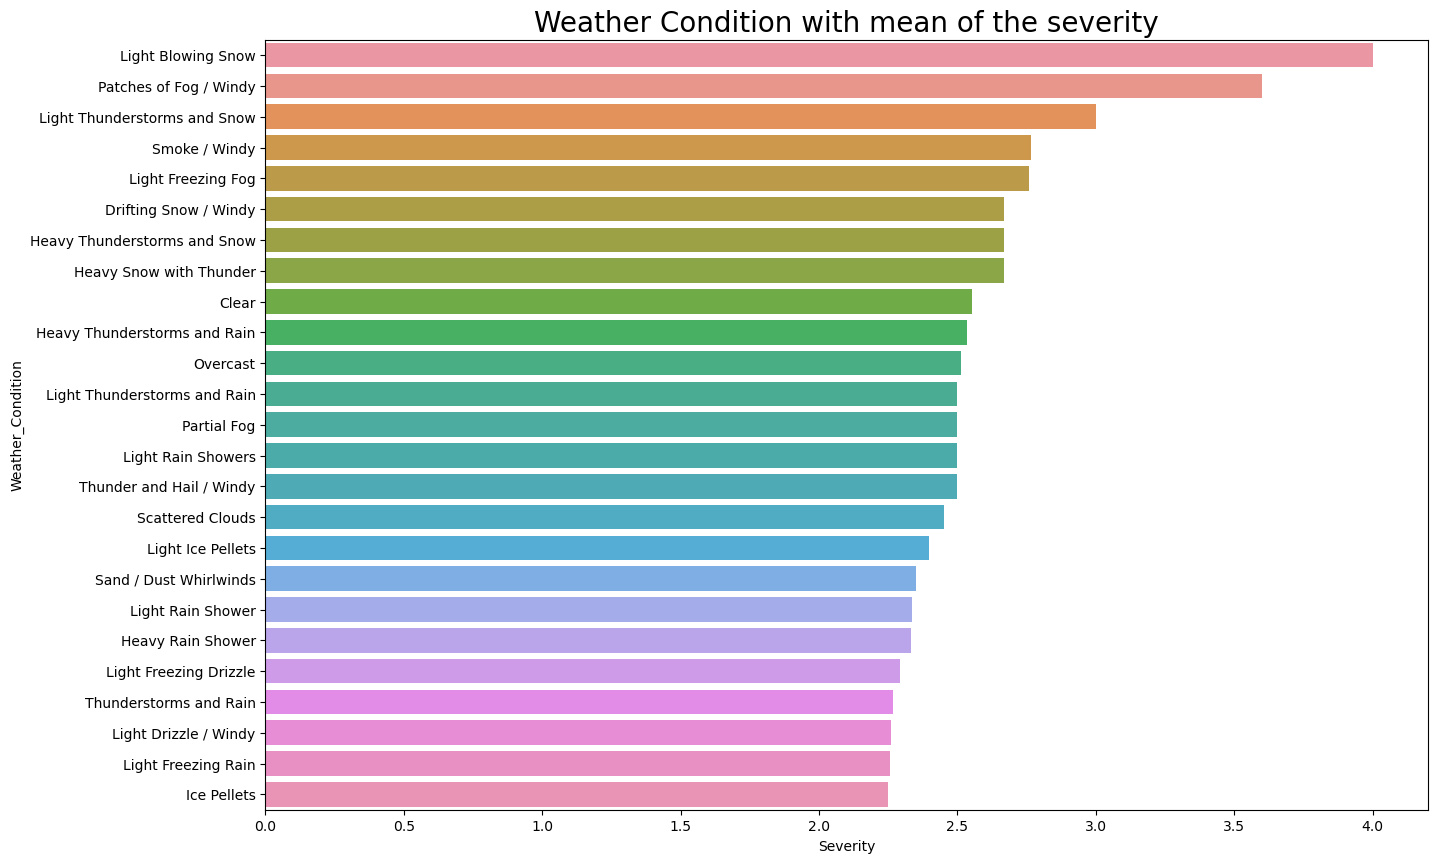

In [17]:
# Weather condition by mean of the Severity
weather_mean_severity = data_best_df.groupby('Weather_Condition')['Severity'].mean().sort_values(ascending=False)
weather_mean_severity_df = pd.DataFrame(weather_mean_severity[:25])

plt.figure(figsize=(15, 10)) # Set the figure size
weather_mean_severity_graph = sns.barplot(y = weather_mean_severity_df.index, x = "Severity", data=weather_mean_severity_df, orient="h")
weather_mean_severity_graph.set_title("Weather Condition with mean of the severity", fontsize = 20)
weather_mean_severity_graph.set_ylabel("Weather_Condition")

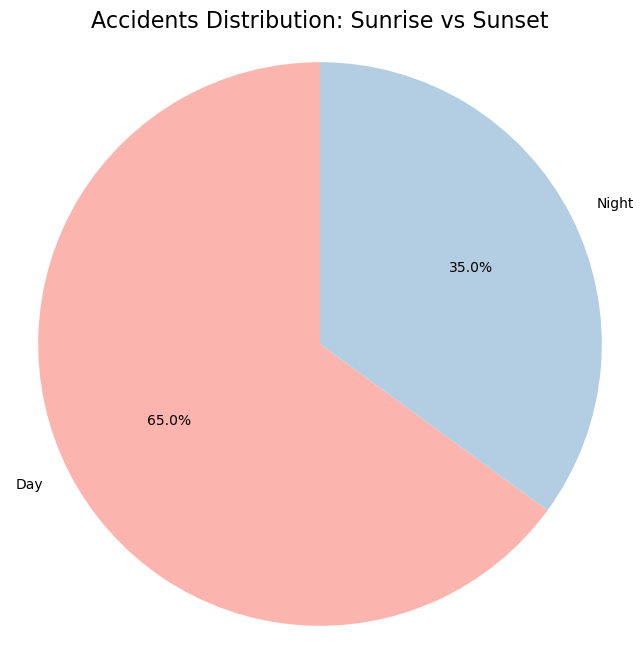

In [18]:
# Ensure the column is string type to avoid plotting errors
data_best_df['Sunrise_Sunset'] = data_best_df['Sunrise_Sunset'].astype(str)

# Prepare data
sunrise_sunset_counts = data_best_df['Sunrise_Sunset'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sunrise_sunset_counts, 
        labels=sunrise_sunset_counts.index, 
        autopct='%.1f%%', 
        startangle=90, 
        colors=plt.cm.Pastel1.colors)
plt.title('Accidents Distribution: Sunrise vs Sunset', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

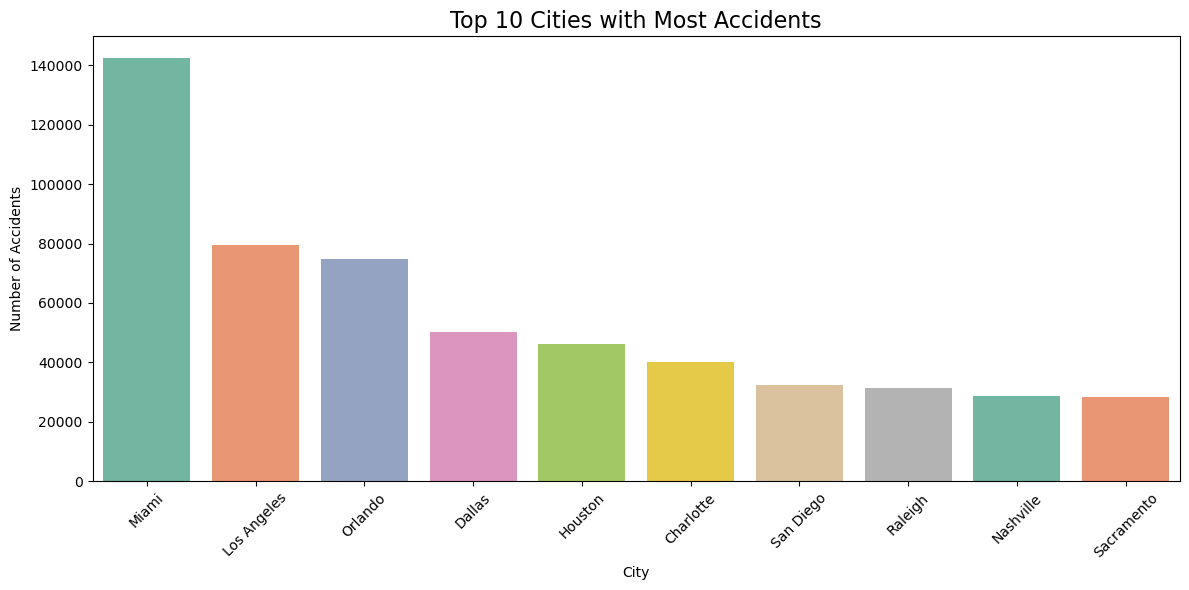

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 10 cities by accident count
top_cities = data_best_df['City'].value_counts().nlargest(10).index
top_city_data = data_best_df[data_best_df['City'].isin(top_cities)]

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=top_city_data, x='City', order=top_cities, palette='Set2')
plt.title('Top 10 Cities with Most Accidents', fontsize=16)
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
# Ensure Start_Time is datetime
data_best_df['Start_Time'] = pd.to_datetime(data_best_df['Start_Time'], errors='coerce')

# Extract hour
data_best_df['Hour'] = data_best_df['Start_Time'].dt.hour

In [21]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

data_best_df['Time_of_Day'] = data_best_df['Hour'].apply(categorize_time)

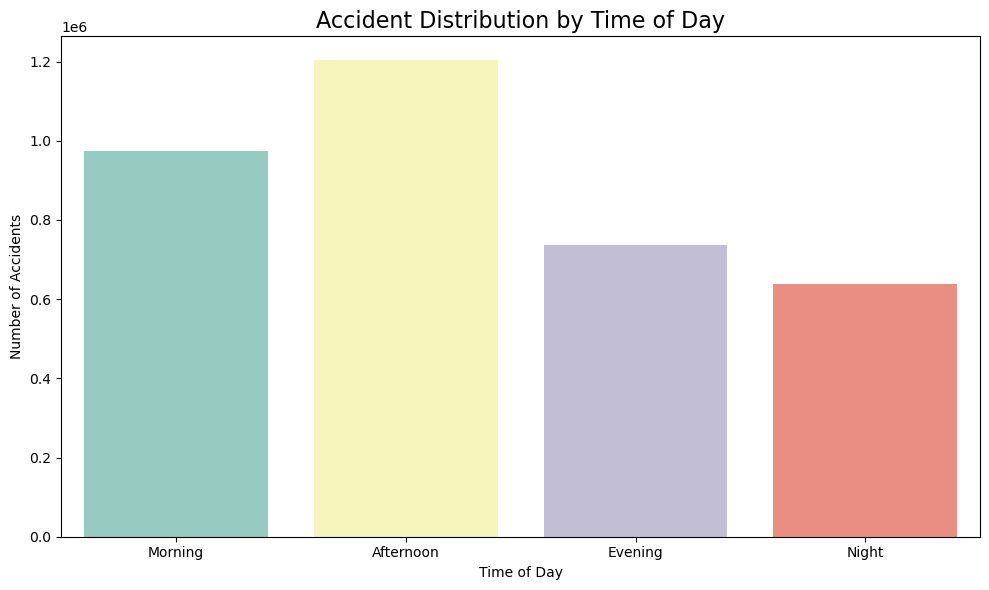

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data_best_df, x='Time_of_Day', order=['Morning', 'Afternoon', 'Evening', 'Night'], palette='Set3')
plt.title('Accident Distribution by Time of Day', fontsize=16)
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

# 5. Feature Engineering

In [23]:
## Only choose a city based on the visualization because of the resources limitation.
data_best_df = data_preprocessed_dropNaN_df[data_preprocessed_dropNaN_df['City'] == 'Charlotte'].copy()

# Reset index
data_best_df.reset_index(inplace=True)

In [24]:
#Feature choosing
# Choose relevant features
relevant_features = ['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset']
data_modelling_df = data_best_df[relevant_features].copy()

In [25]:
# Duration = End_Time - Start_Time; Create a new feature for modeling.
data_modelling_df['Duration'] = (data_modelling_df['End_Time'] - data_modelling_df['Start_Time']).dt.total_seconds() / 3600
data_modelling_df.drop('End_Time', axis=1, inplace=True)

In [26]:
# Transform Month/week/Hour to different features
data_modelling_df["Month"] = data_modelling_df["Start_Time"].dt.month
data_modelling_df["Week"] = data_modelling_df["Start_Time"].dt.dayofweek
data_modelling_df["Hour"] = data_modelling_df["Start_Time"].dt.hour
data_modelling_df.drop("Start_Time", axis=1, inplace=True)

In [27]:
# One Hot Encoding
# Select features that are suitable for One Hot Encoding
one_hot_features = ['Wind_Direction', 'Weather_Condition']

# Wind_Direction Categorizing
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('C'), 'Wind_Direction'] = 'C' #Calm
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('E'), 'Wind_Direction'] = 'E' #East, ESE, ENE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('W'), 'Wind_Direction'] = 'W' #West, WSW, WNW
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('S'), 'Wind_Direction'] = 'S' #South, SSW, SSE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('N'), 'Wind_Direction'] = 'N' #North, NNW, NNE
data_modelling_df.loc[data_modelling_df['Wind_Direction'].str.startswith('V'), 'Wind_Direction'] = 'V' #Variable

In [28]:
# Weather_Condition Categorizing
# Fair, Cloudy, Clear, Overcast, Snow, Haze, Rain, Thunderstorm, Windy, Hail, Thunder, Dust, Tornado
data_modelling_df['Weather_Fair'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Fair', case=False, na = False), 1, 0)
data_modelling_df['Weather_Cloudy'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Cloudy', case=False, na = False), 1, 0)
data_modelling_df['Weather_Clear'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
data_modelling_df['Weather_Overcast'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Overcast', case=False, na = False), 1, 0)
data_modelling_df['Weather_Snow'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Snow|Wintry|Sleet', case=False, na = False), 1, 0)
data_modelling_df['Weather_Haze'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Smoke|Fog|Mist|Haze', case=False, na = False), 1, 0)
data_modelling_df['Weather_Rain'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Rain|Drizzle|Showers', case=False, na = False), 1, 0)
data_modelling_df['Weather_Thunderstorm'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Thunderstorms|T-Storm', case=False, na = False), 1, 0)
data_modelling_df['Weather_Windy'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Windy|Squalls', case=False, na = False), 1, 0)
data_modelling_df['Weather_Hail'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Hail|Ice Pellets', case=False, na = False), 1, 0)
data_modelling_df['Weather_Thunder'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Thunder', case=False, na = False), 1, 0)
data_modelling_df['Weather_Dust'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Dust', case=False, na = False), 1, 0)
data_modelling_df['Weather_Tornado'] = np.where(data_modelling_df['Weather_Condition'].str.contains('Tornado', case=False, na = False), 1, 0)

In [29]:
# Transform the one-hot features, then delete them
onehot_df = pd.get_dummies(data_modelling_df['Wind_Direction'], prefix='Wind')
data_modelling_df = pd.concat([data_modelling_df, onehot_df], axis=1)
data_modelling_df.drop(one_hot_features, axis=1, inplace=True)

In [30]:
#  Label Encoding
# Select features that are suitable for Label Encoding
label_encoding_features = ['Amenity','Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway','Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal','Turning_Loop', 'Sunrise_Sunset']

# Label Encoding
for feature in label_encoding_features:
    data_modelling_df[feature] = LabelEncoder().fit_transform(data_modelling_df[feature])

# 6. Modelling

In [45]:
# Train/Test Split
X_cla = data_modelling_df.drop("Severity", axis=1)
Y_cla = data_modelling_df.Severity
x_train_cla, x_test_cla, y_train_cla, y_test_cla = train_test_split(X_cla, Y_cla, test_size = 0.4, random_state=0, stratify=Y_cla)
print(f'Train Cla: {x_train_cla.shape} \n Test Cla: {x_test_cla.shape}')
cla_feature_names = x_train_cla.columns.tolist()

Train Cla: (24136, 44) 
 Test Cla: (16092, 44)


In [33]:
# normalize must be one of {'true', 'pred', 'all', None}
'''
Description: Plot the confusion matrix
classifier: The classifier
Return: None
'''
def draw_confusion_matrix(classifier):
    fig, ax = plt.subplots(figsize=(12, 6))
    ConfusionMatrixDisplay.from_estimator(
        classifier, x_test_cla, y_test_cla, 
        cmap=plt.cm.Blues, normalize=None, ax=ax
    )
    ax.set_title("Confusion Matrix", fontsize=15)
    plt.show()

### Random Forest

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

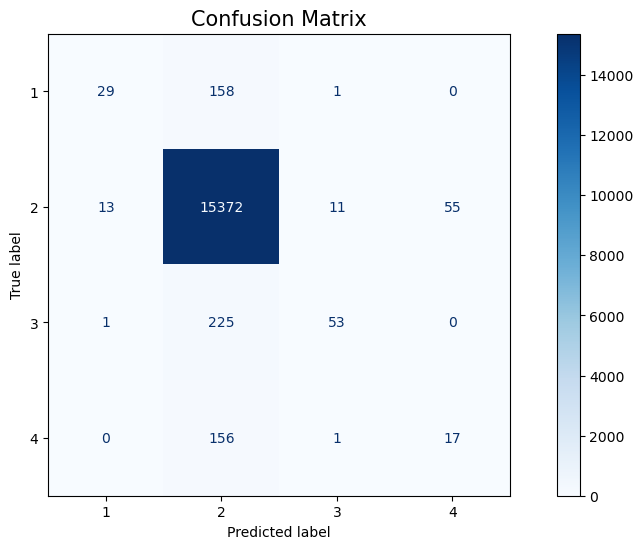

              precision    recall  f1-score   support

           1       0.67      0.15      0.25       188
           2       0.97      0.99      0.98     15451
           3       0.80      0.19      0.31       279
           4       0.24      0.10      0.14       174

    accuracy                           0.96     16092
   macro avg       0.67      0.36      0.42     16092
weighted avg       0.95      0.96      0.95     16092

balanced_accuracy: 0.3592019221515949
roc_ovo_macro: 0.8480167439976389
roc_ovr_weighted: 0.8833395247624123


In [35]:
# Random Forest Classification
rf_cla = RandomForestClassifier(random_state=0)
rf_cla.fit(x_train_cla, y_train_cla)
rf_cla_predictions = rf_cla.predict(x_test_cla)
rf_cla_results = classification_report(y_test_cla, rf_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
draw_confusion_matrix(rf_cla)
print(classification_report(y_test_cla, rf_cla_predictions, zero_division=True))

# balanced_accuracy
rf_cla_balanced_accuracy = balanced_accuracy_score(y_test_cla, rf_cla_predictions)
print(f'balanced_accuracy: {rf_cla_balanced_accuracy}')

# ROC_AUC score
rf_cla_roc_ovo_macro = roc_auc_score(y_test_cla, rf_cla.predict_proba(x_test_cla), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
rf_cla_roc_ovr_weighted = roc_auc_score(y_test_cla, rf_cla.predict_proba(x_test_cla), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {rf_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {rf_cla_roc_ovr_weighted}")

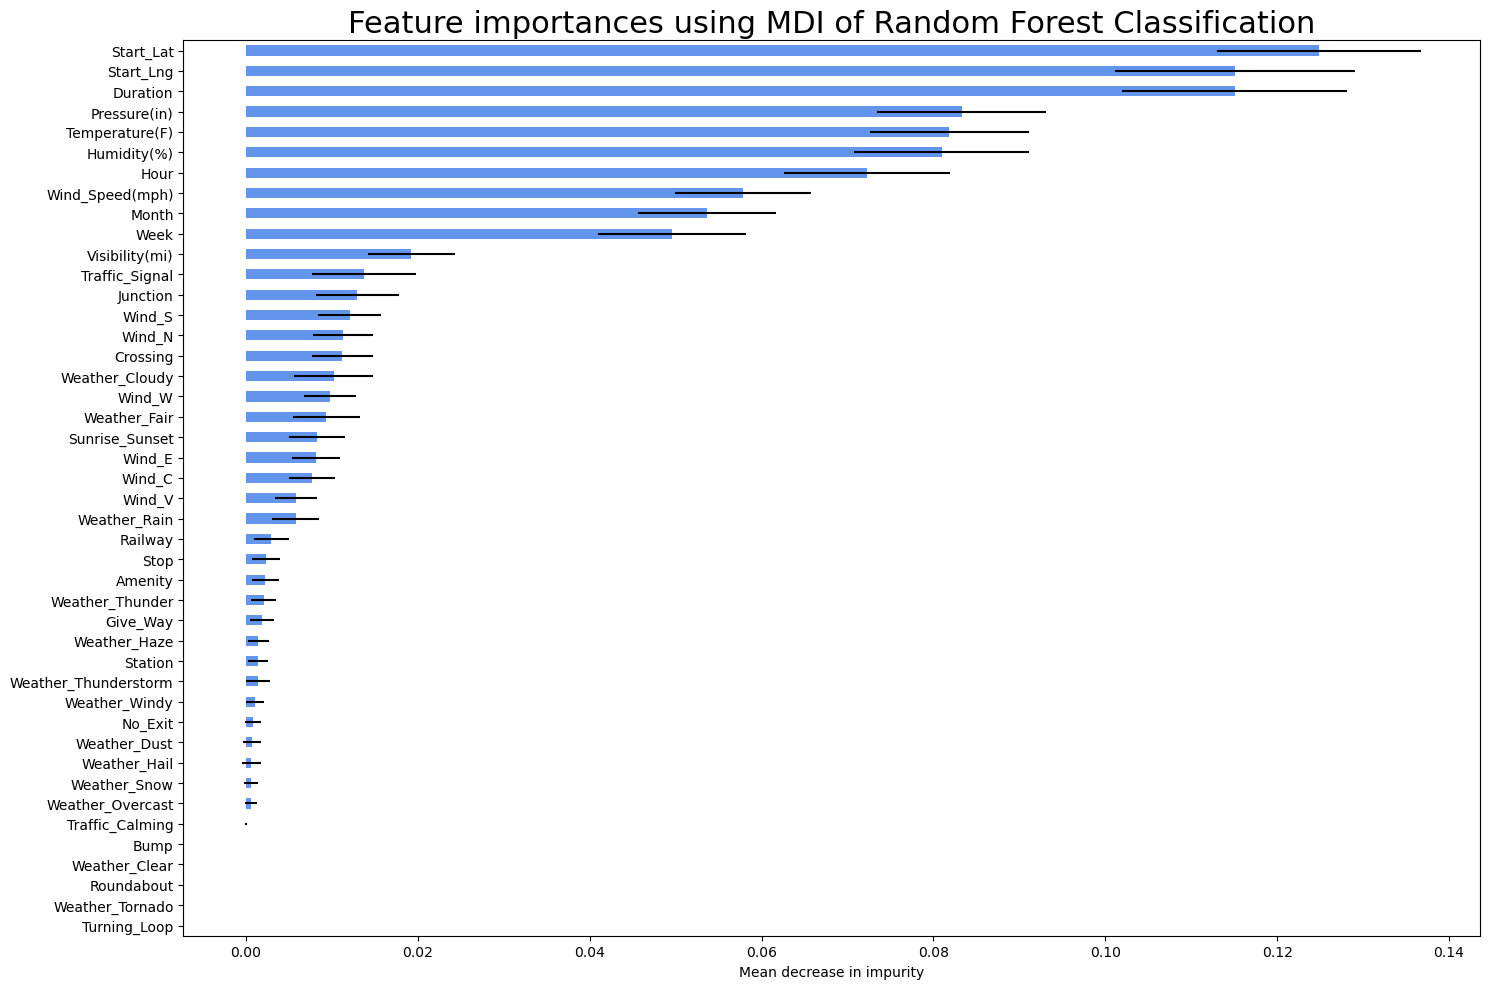

In [36]:
# Calculate Standard Deviation of each feature for all the trees
rf_cla_importances_std = np.std([tree.feature_importances_ for tree in rf_cla.estimators_], axis=0)
rf_cla_importances = pd.Series(rf_cla.feature_importances_, index=X_cla.columns)
rf_cla_importances_df = pd.DataFrame(rf_cla_importances, columns=['Importance'])
rf_cla_importances_df['Std'] = rf_cla_importances_std
rf_cla_importances_df.sort_values('Importance', ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
rf_cla_importances_df['Importance'].plot.barh(xerr=rf_cla_importances_df['Std'], color='cornflowerblue', ax=ax)
ax.set_title("Feature importances using MDI of Random Forest Classification", fontsize = 22)
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

### Gradient Boost Tree

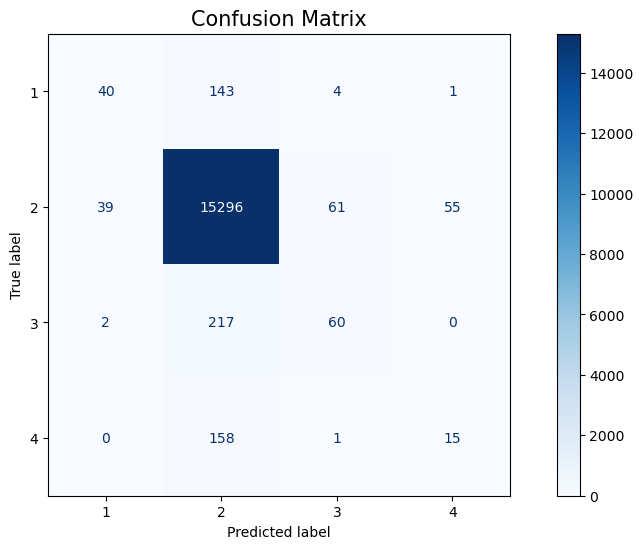

              precision    recall  f1-score   support

           1       0.49      0.21      0.30       188
           2       0.97      0.99      0.98     15451
           3       0.48      0.22      0.30       279
           4       0.21      0.09      0.12       174

    accuracy                           0.96     16092
   macro avg       0.54      0.38      0.42     16092
weighted avg       0.95      0.96      0.95     16092

balanced_accuracy: 0.3759987260704171
roc_ovo_macro: 0.806142399168501
roc_ovr_weighted: 0.8918467949283009


In [37]:
# Gradient Boosting Classification
gbt_cla = GradientBoostingClassifier(learning_rate=0.1, max_depth=10, min_impurity_decrease=0.1, min_samples_leaf=2, n_estimators=100, random_state=0)
gbt_cla.fit(x_train_cla, y_train_cla)
gbt_cla_predictions = gbt_cla.predict(x_test_cla)
gbt_cla_results = classification_report(y_test_cla, gbt_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
draw_confusion_matrix(gbt_cla)
print(classification_report(y_test_cla, gbt_cla_predictions, zero_division=True))

# balanced_accuracy
gbt_cla_balanced_accuracy = balanced_accuracy_score(y_test_cla, gbt_cla_predictions)
print(f'balanced_accuracy: {gbt_cla_balanced_accuracy}')

# ROC_AUC score
gbt_cla_roc_ovo_macro = roc_auc_score(y_test_cla, gbt_cla.predict_proba(x_test_cla), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
gbt_cla_roc_ovr_weighted = roc_auc_score(y_test_cla, gbt_cla.predict_proba(x_test_cla), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {gbt_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {gbt_cla_roc_ovr_weighted}")

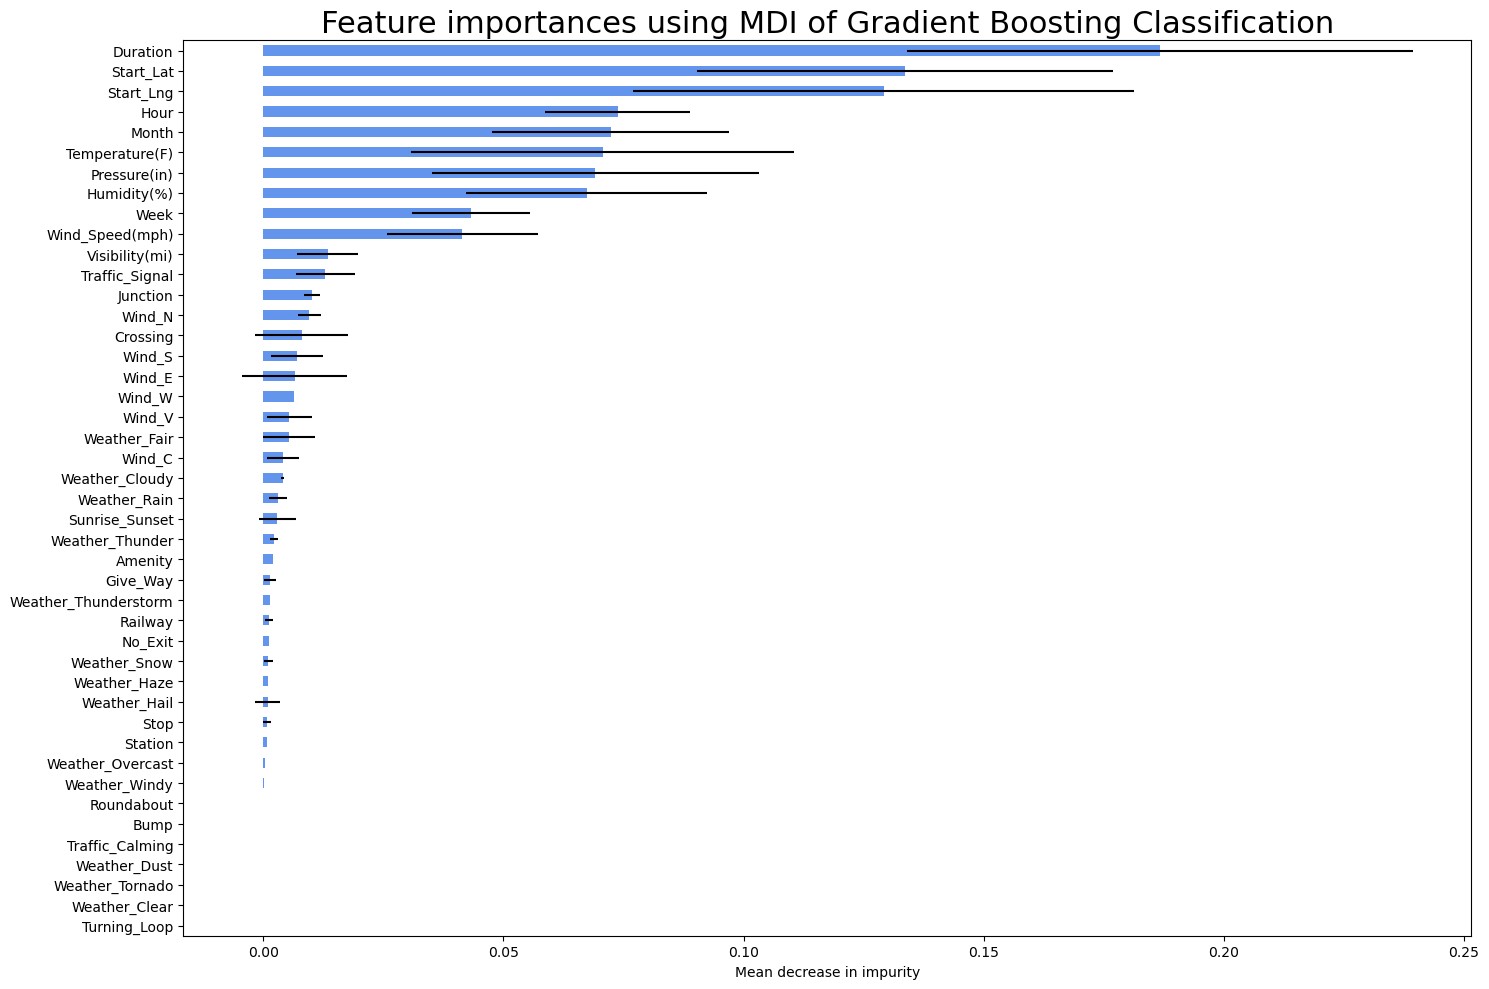

In [38]:
# Calculate Standard Deviation of each feature for all the trees
gbt_cla_importances_std = np.std([tree[0].feature_importances_ for tree in gbt_cla.estimators_], axis=0)
gbt_cla_importances = pd.Series(gbt_cla.feature_importances_, index=X_cla.columns)
gbt_cla_importances_df = pd.DataFrame(gbt_cla_importances, columns=['Importance'])
gbt_cla_importances_df['Std'] = gbt_cla_importances_std
gbt_cla_importances_df.sort_values('Importance', ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(15,10))
gbt_cla_importances_df['Importance'].plot.barh(xerr=gbt_cla_importances_df['Std'], color='cornflowerblue', ax=ax)
ax.set_title("Feature importances using MDI of Gradient Boosting Classification", fontsize = 22)
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

### Decision Tree

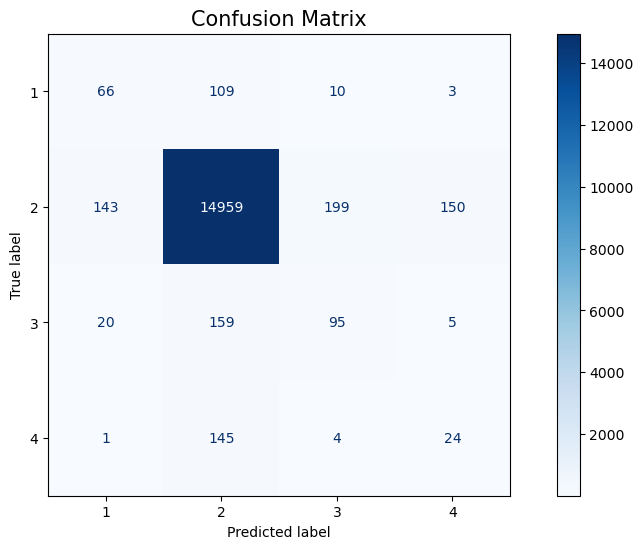

              precision    recall  f1-score   support

           1       0.29      0.35      0.32       188
           2       0.97      0.97      0.97     15451
           3       0.31      0.34      0.32       279
           4       0.13      0.14      0.13       174

    accuracy                           0.94     16092
   macro avg       0.43      0.45      0.44     16092
weighted avg       0.94      0.94      0.94     16092

balanced_accuracy: 0.44941351430004234
roc_ovo_macro: 0.6335811641390253
roc_ovr_weighted: 0.6630857719805008


In [39]:
# Decision Tree Classification
dt_cla = DecisionTreeClassifier(random_state=0)
dt_cla.fit(x_train_cla, y_train_cla)
dt_cla_predictions = dt_cla.predict(x_test_cla)
dt_cla_results = classification_report(y_test_cla, dt_cla_predictions, zero_division=True, output_dict=True)

# Confusion matrix and Classification report
draw_confusion_matrix(dt_cla)
print(classification_report(y_test_cla, dt_cla_predictions, zero_division=True))

# balanced_accuracy
dt_cla_balanced_accuracy = balanced_accuracy_score(y_test_cla, dt_cla_predictions)
print(f'balanced_accuracy: {dt_cla_balanced_accuracy}')

# ROC_AUC score
dt_cla_roc_ovo_macro = roc_auc_score(y_test_cla, dt_cla.predict_proba(x_test_cla), multi_class='ovo', average='macro') #Insensitive to class imbalance when average == 'macro'
dt_cla_roc_ovr_weighted = roc_auc_score(y_test_cla, dt_cla.predict_proba(x_test_cla), multi_class='ovr', average='weighted') #Sensitive to class imbalance even when average == 'macro'
print(f"roc_ovo_macro: {dt_cla_roc_ovo_macro}") 
print(f"roc_ovr_weighted: {dt_cla_roc_ovr_weighted}")

# 7. Model Comparision

In [40]:
# Gather all the classification performance in one table
cla_results = pd.DataFrame([
     
    (dt_cla_balanced_accuracy, dt_cla_results['accuracy'], dt_cla_results['weighted avg']['precision'], dt_cla_results['weighted avg']['recall'], dt_cla_results['weighted avg']['f1-score'], dt_cla_roc_ovo_macro, dt_cla_roc_ovr_weighted),
    (gbt_cla_balanced_accuracy, gbt_cla_results['accuracy'], gbt_cla_results['weighted avg']['precision'], gbt_cla_results['weighted avg']['recall'], gbt_cla_results['weighted avg']['f1-score'], gbt_cla_roc_ovo_macro, gbt_cla_roc_ovr_weighted),
    (rf_cla_balanced_accuracy, rf_cla_results['accuracy'], rf_cla_results['weighted avg']['precision'], rf_cla_results['weighted avg']['recall'], rf_cla_results['weighted avg']['f1-score'], rf_cla_roc_ovo_macro, rf_cla_roc_ovr_weighted) 
    ], 
    columns=['Accuracy(Balanced)', 'Accuracy','Precision(Weighted_avg)', 'Recall(Weighted_avg)', 'F1-score(Weighted_avg)', 'Roc_ovo(macro)', 'Roc_ovr(weighted)'], 
    index= [
            'Decision Tree',
            'Gradient Boosting Tree',
            'Random Forest'
            ])

cla_results.sort_values(by=['F1-score(Weighted_avg)'], ascending=False)

,Accuracy(Balanced),Accuracy,Precision(Weighted_avg),Recall(Weighted_avg),F1-score(Weighted_avg),Roc_ovo(macro),Roc_ovr(weighted)
Random Forest,0.359202,0.961409,0.951995,0.961409,0.951001,0.848017,0.883340
Gradient Boosting Tree,0.375999,0.957681,0.945025,0.957681,0.949434,0.806142,0.891847
Decision Tree,0.449414,0.941089,0.944496,0.941089,0.942734,0.633581,0.663086


In [48]:
import pickle

In [50]:
# Save the model
with open('Road_accident_model.pkl', 'wb') as file:
    pickle.dump(rf_cla, file)

print("Successfully saved aas Road_accident_model.pkl")

Successfully saved aas Road_accident_model.pkl


In [52]:
with open('Road_accident_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

print(" Model loaded successfully!")

 Model loaded successfully!
